# Exploratory Data Analysis (EDA) learning resources

**Sources of questions that EDA can answer:**

https://www.linkedin.com/pulse/15-questions-ask-during-exploratory-data-analysis-vikash-singh

https://medium.com/@gauravtopre9/questions-to-ask-while-eda-1a19f82fbc5d

https://www.quanthub.com/how-do-i-use-questions-to-guide-exploratory-data-analysis/

https://shopify.engineering/conducting-exploratory-data-analysis#

**Sources of code for EDA:**

https://www.kaggle.com/code/ekami66/detailed-exploratory-data-analysis-with-python#Exploratory-data-analysis-(EDA)

https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/#h-step-13-eda-multivariate-analysis

# Data source

https://www.kaggle.com/datasets/hopesb/hr-analytics-dataset?select=Cleaned_HR_Data_Analysis.csv

>The uploaded dataset contains detailed information about employees, training programs, and other HR-related metrics"

See the link for more information about the data set.

There is a column called "EmployeeStatus" that tells us if an employee is still employed or whether their contract has been terminated.

We can use the data to understand what features may influence whether employment is terminated or still active. i.e. Why might people leave this company?

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import scipy
import seaborn as sns

In [2]:
data = pd.read_csv('Cleaned_HR_Data_Analysis.csv')

In [3]:
data.head()

,Employee ID,StartDate,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,DepartmentType,Division,...,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Date,Training Program Name,Training Type,Training Outcome,Training Duration(Days),Training Cost,Age
0,3427,20-Sep-19,Production Technician I,CCDR,Active,Contract,Zone C,Temporary,Production,Finance & Accounting,...,1,2,3,15-Jul-23,Leadership Development,Internal,Failed,2,606.11,50
1,3428,11-Feb-23,Production Technician I,EW,Active,Contract,Zone A,Part-Time,Production,Aerial,...,2,1,5,12-Sep-22,Customer Service,External,Incomplete,4,673.02,58
2,3429,10-Dec-18,Area Sales Manager,PL,Active,Full-Time,Zone B,Part-Time,Sales,General - Sga,...,1,2,1,13-Aug-22,Leadership Development,External,Failed,2,413.28,27
3,3430,21-Jun-21,Area Sales Manager,CCDR,Active,Contract,Zone A,Full-Time,Sales,Finance & Accounting,...,5,5,4,15-Dec-22,Project Management,External,Completed,3,663.78,23
4,3431,29-Jun-19,Area Sales Manager,TNS,Active,Contract,Zone A,Temporary,Sales,General - Con,...,2,5,3,13-Jul-23,Technical Skills,External,Failed,5,399.03,50


# Contents

This notebook has intentionally not been commented on so that you can include your own notes and information. Please let Sally know if you have tried the resources and have any questions.

There are two sections to this notebook:

a) Data structure, distributions, null values, duplicates and outliers

b) Correlations and relationships

We will cover feature engineering in another session.

Each section analyses the data to understand more about it. At the start of each section there are example questions that have been answered below it using Python code.

# a) Data structure, distributions, nulls, duplicates and outliers

Example questions:

**Data structure and distribution**

1. How many features do you have?
2. How many observations do you have?
3. What is the data type of each feature?
4. From what you know about the features of your dataset, do the data types make sense? Do you need to change any?
5. Do you have null values?
6. How much memory does this dataset use? Could this pose a problem for you later on?
7. What is the distribution of each variable?
8. Do there appear to be outliers?
9. Think about what the variables mean and what the histograms say about their values and their spread — are there any surprises?
10. Are the max/min values reasonable for the variables? Do you see any values that look like errors?
11. What is the mean for each variable? What do the means tell you about your dataset as a whole?


**Null Values & Duplicates**

1. Check the duplicated sum.
2. Is the null value a result of the way data was recorded? (Was it kept Null Intentionally — we can decide this by carefully understanding the data)
3. Can you drop the rows with null values without it significantly affecting your analysis?
4. Looking at the distributions of the variables, can you justify filling in the missing values with the mean or median for that variable? (We use mean for Numerical Data with no Outliers, Median for Numerical Data with Outliers and we use Mode for Categorical data)
5. If your data is time-series data, can you fill the missing values with interpolation?
6. Are there so many missing values for a variable that you should drop that variable from your dataset?


**Outliers**

1. Do you have outliers in your variables?
2. Why do you think you have outliers?
3. Do the outliers represent real observations (i.e. not errors)?
4. Should you exclude these observations?

## Counts, nulls and data types

In [4]:
print(f"""{len(data.columns)}
{data.columns}
""")

28
Index(['Employee ID', 'StartDate', 'Title', 'BusinessUnit', 'EmployeeStatus',
       'EmployeeType', 'PayZone', 'EmployeeClassificationType',
       'DepartmentType', 'Division', 'DOB', 'State', 'GenderCode', 'RaceDesc',
       'MaritalDesc', 'Performance Score', 'Current Employee Rating',
       'Survey Date', 'Engagement Score', 'Satisfaction Score',
       'Work-Life Balance Score', 'Training Date', 'Training Program Name',
       'Training Type', 'Training Outcome', 'Training Duration(Days)',
       'Training Cost', 'Age'],
      dtype='object')



In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 2845 non-null   int64  
 1   StartDate                   2845 non-null   object 
 2   Title                       2845 non-null   object 
 3   BusinessUnit                2845 non-null   object 
 4   EmployeeStatus              2845 non-null   object 
 5   EmployeeType                2845 non-null   object 
 6   PayZone                     2845 non-null   object 
 7   EmployeeClassificationType  2845 non-null   object 
 8   DepartmentType              2845 non-null   object 
 9   Division                    2845 non-null   object 
 10  DOB                         2845 non-null   object 
 11  State                       2845 non-null   object 
 12  GenderCode                  2845 non-null   object 
 13  RaceDesc                    2845 

In [6]:
data.isnull().sum()

Employee ID                   0
StartDate                     0
Title                         0
BusinessUnit                  0
EmployeeStatus                0
EmployeeType                  0
PayZone                       0
EmployeeClassificationType    0
DepartmentType                0
Division                      0
DOB                           0
State                         0
GenderCode                    0
RaceDesc                      0
MaritalDesc                   0
Performance Score             0
Current Employee Rating       0
Survey Date                   0
Engagement Score              0
Satisfaction Score            0
Work-Life Balance Score       0
Training Date                 0
Training Program Name         0
Training Type                 0
Training Outcome              0
Training Duration(Days)       0
Training Cost                 0
Age                           0
dtype: int64

In [7]:
data_dtypes_converted = data.convert_dtypes()

data_dtypes_converted.dtypes

Employee ID                            Int64
StartDate                     string[python]
Title                         string[python]
BusinessUnit                  string[python]
EmployeeStatus                string[python]
EmployeeType                  string[python]
PayZone                       string[python]
EmployeeClassificationType    string[python]
DepartmentType                string[python]
Division                      string[python]
DOB                           string[python]
State                         string[python]
GenderCode                    string[python]
RaceDesc                      string[python]
MaritalDesc                   string[python]
Performance Score             string[python]
Current Employee Rating                Int64
Survey Date                   string[python]
Engagement Score                       Int64
Satisfaction Score                     Int64
Work-Life Balance Score                Int64
Training Date                 string[python]
Training P

In [8]:
data.nunique()

Employee ID                   2845
StartDate                     1472
Title                           32
BusinessUnit                    10
EmployeeStatus                   2
EmployeeType                     3
PayZone                          3
EmployeeClassificationType       3
DepartmentType                   6
Division                        25
DOB                           2664
State                           28
GenderCode                       2
RaceDesc                         5
MaritalDesc                      4
Performance Score                4
Current Employee Rating          5
Survey Date                    366
Engagement Score                 5
Satisfaction Score               5
Work-Life Balance Score          5
Training Date                  366
Training Program Name            5
Training Type                    2
Training Outcome                 4
Training Duration(Days)          5
Training Cost                 2813
Age                             66
dtype: int64

In [9]:
unique_id_col = ['Employee ID']
date_cols = ['StartDate', 'DOB', 'Survey Date', 'Training Date']
numerical_cols = ['Training Cost', 'Training Duration(Days)', 'Age']
ordinal_cols = ['PayZone', 'Performance Score', 'Current Employee Rating', 'Engagement Score', 'Satisfaction Score', 'Work-Life Balance Score']

nominal_cols = data.columns.drop(unique_id_col).drop(date_cols).drop(numerical_cols).drop(ordinal_cols)

## Duplicates

In [10]:
print(data[unique_id_col].nunique())

print(data[unique_id_col].drop_duplicates().nunique())


Employee ID    2845
dtype: int64
Employee ID    2845
dtype: int64


In [11]:
data[unique_id_col].duplicated(keep=False).sum()

0

## Distribution and outliers

### Nominal variables structure and distributions

In [12]:
data[nominal_cols].head()

,Title,BusinessUnit,EmployeeStatus,EmployeeType,EmployeeClassificationType,DepartmentType,Division,State,GenderCode,RaceDesc,MaritalDesc,Training Program Name,Training Type,Training Outcome
0,Production Technician I,CCDR,Active,Contract,Temporary,Production,Finance & Accounting,MA,Female,White,Widowed,Leadership Development,Internal,Failed
1,Production Technician I,EW,Active,Contract,Part-Time,Production,Aerial,MA,Male,Hispanic,Widowed,Customer Service,External,Incomplete
2,Area Sales Manager,PL,Active,Full-Time,Part-Time,Sales,General - Sga,MA,Male,Hispanic,Widowed,Leadership Development,External,Failed
3,Area Sales Manager,CCDR,Active,Contract,Full-Time,Sales,Finance & Accounting,ND,Male,Other,Single,Project Management,External,Completed
4,Area Sales Manager,TNS,Active,Contract,Temporary,Sales,General - Con,FL,Female,Other,Married,Technical Skills,External,Failed



Title
Enterprise Architect               2
Sr. DBA                            4
Data Architect                     5
Principal Data Architect           6
Software Engineering Manager       7
Data Analyst                       8
Sr. Accountant                    10
CIO                               11
BI Director                       11
President & CEO                   11
IT Director                       11
IT Manager - Support              11
Director of Operations            11
Director of Sales                 11
IT Manager - Infra                11
Shared Services Manager           20
IT Manager - DB                   22
Database Administrator            25
Sales Manager                     30
Senior BI Developer               30
Administrative Assistant          33
Accountant I                      33
Sr. Network Engineer              41
BI Developer                      44
Data Analyst                      47
Network Engineer                  55
IT Support                     

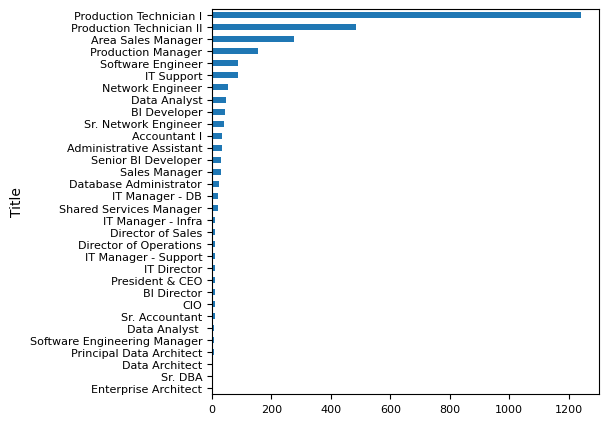


BusinessUnit
SVG     281
EW      282
MSC     282
PL      283
TNS     283
CCDR    284
PYZ     285
WBL     286
BPC     288
NEL     291
Name: BusinessUnit, dtype: int64
          


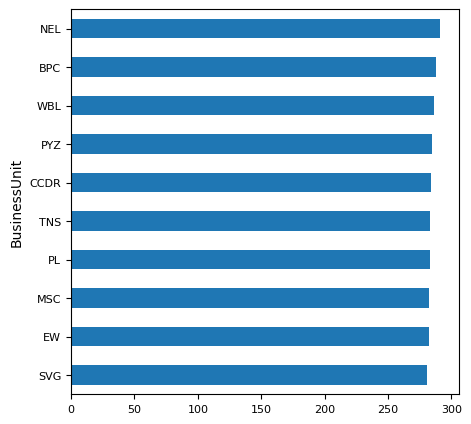


EmployeeStatus
Terminated     387
Active        2458
Name: EmployeeStatus, dtype: int64
          


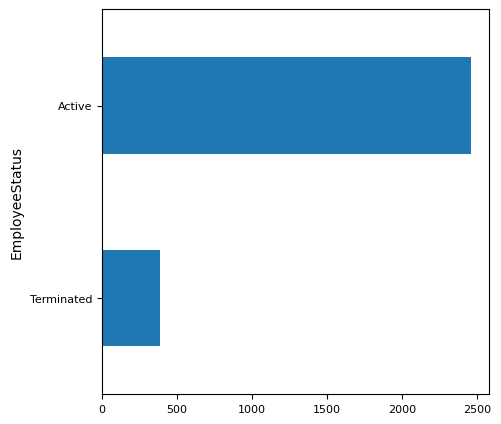


EmployeeType
Part-Time    897
Contract     951
Full-Time    997
Name: EmployeeType, dtype: int64
          


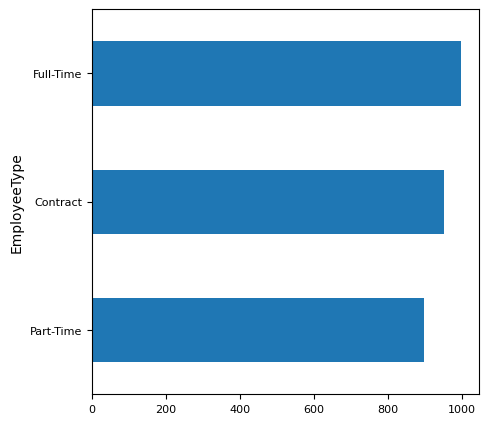


EmployeeClassificationType
Part-Time    899
Full-Time    966
Temporary    980
Name: EmployeeClassificationType, dtype: int64
          


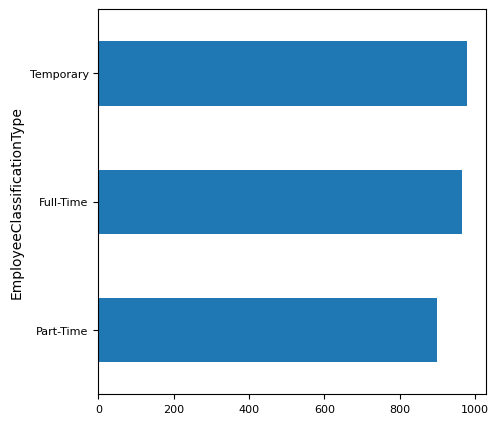


DepartmentType
Executive Office          24
Admin Offices             79
Software Engineering     112
Sales                    311
IT/IS                    409
Production              1910
Name: DepartmentType, dtype: int64
          


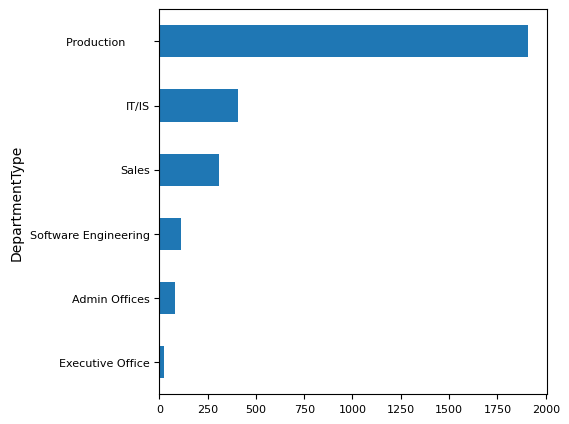


Division
Corp Operations               2
Sales & Marketing             8
Safety                        8
Isp                          14
Project Management - Eng     15
Technology / It              21
Billable Consultants         23
People Services              24
Underground                  31
Wireless                     32
Executive                    41
Shop (Fleet)                 53
Catv                         54
Yard (Material Handling)     55
Finance & Accounting         69
Fielders                     80
General - Eng                85
Splicing                    108
General - Sga               112
Project Management - Con    172
Wireline Construction       175
Aerial                      181
Engineers                   261
General - Con               474
Field Operations            747
Name: Division, dtype: int64
          


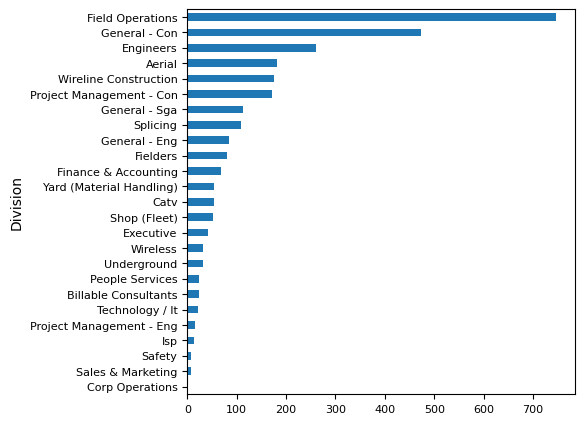


State
FL       1
NV       1
MT       1
OH       1
ME       2
NH       2
VA       2
UT       2
GA       3
RI       4
VT       4
ND       4
NC       5
OR       9
CA      10
NY      11
AL      11
PA      13
IN      14
WA      20
CO      21
TN      24
KY      27
AZ      31
ID      31
CT      33
TX      35
MA    2523
Name: State, dtype: int64
          


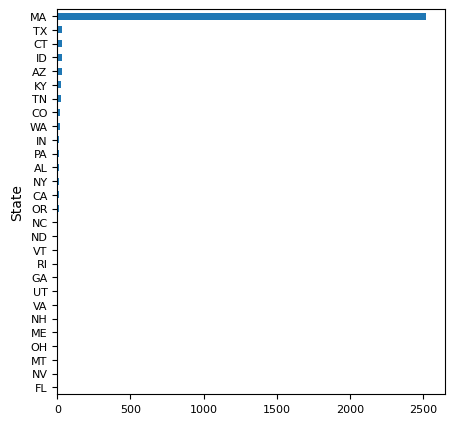


GenderCode
Male      1257
Female    1588
Name: GenderCode, dtype: int64
          


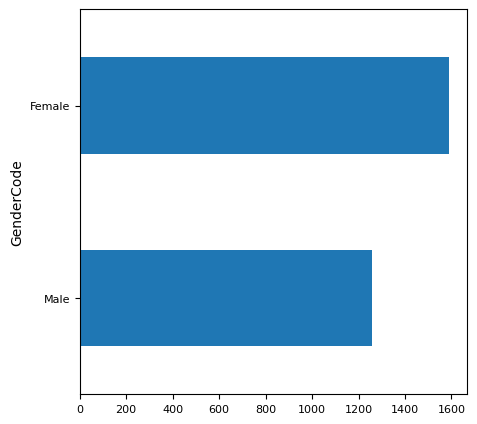


RaceDesc
Hispanic    540
Other       556
White       572
Black       579
Asian       598
Name: RaceDesc, dtype: int64
          


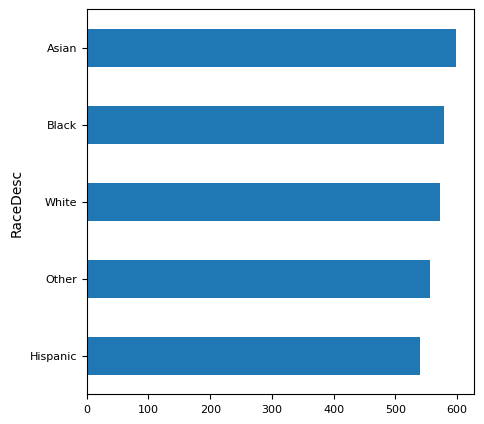


MaritalDesc
Widowed     684
Divorced    700
Married     730
Single      731
Name: MaritalDesc, dtype: int64
          


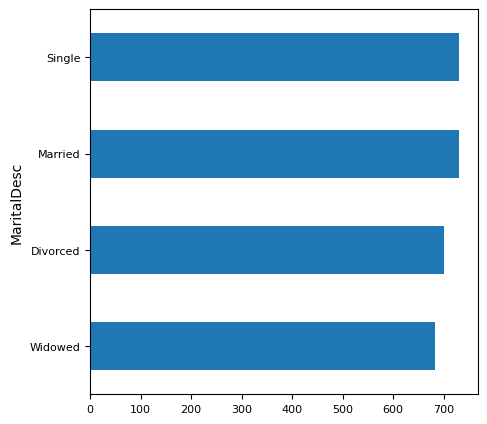


Training Program Name
Customer Service          540
Technical Skills          543
Leadership Development    544
Project Management        585
Communication Skills      633
Name: Training Program Name, dtype: int64
          


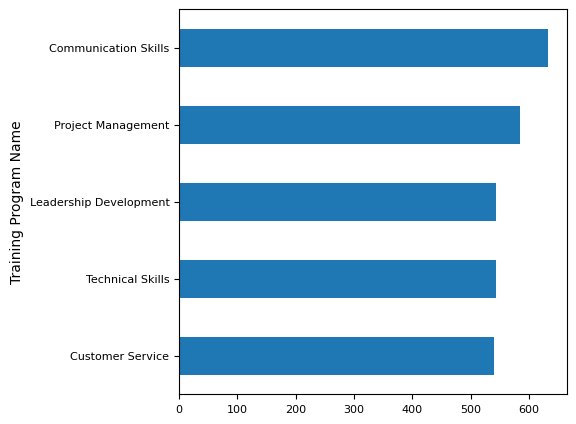


Training Type
Internal    1421
External    1424
Name: Training Type, dtype: int64
          


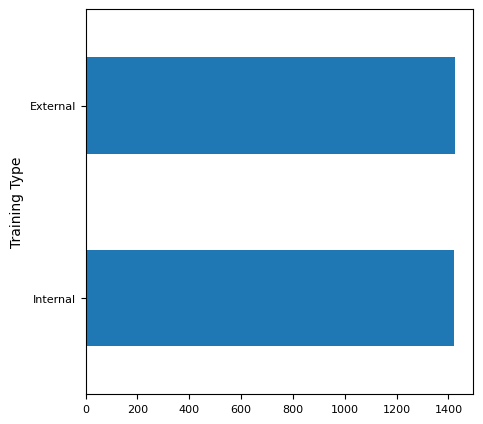


Training Outcome
Failed        668
Passed        709
Incomplete    731
Completed     737
Name: Training Outcome, dtype: int64
          


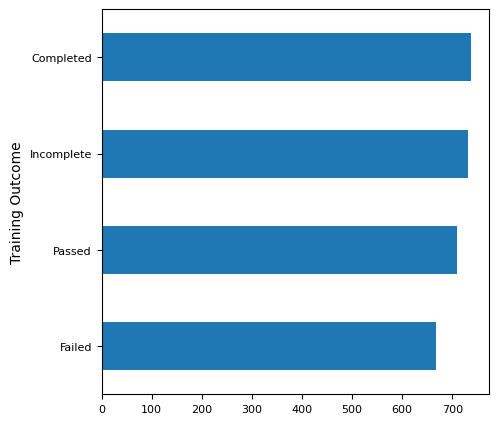

In [13]:
for i in range(len(nominal_cols)):
    col_name = nominal_cols[i]
    counts = pd.Series(data[col_name].value_counts(), name=col_name).sort_values(ascending=True)


    print(f"""
{counts}
          """)
    counts.plot(kind='barh', fontsize=8, figsize=(5, 5))
    plt.show()

### Date variables structure and distributions

In [14]:
data[date_cols].head()

,StartDate,DOB,Survey Date,Training Date
0,20-Sep-19,07-10-1969,14-01-2023,15-Jul-23
1,11-Feb-23,30-08-1965,09-09-2022,12-Sep-22
2,10-Dec-18,06-10-1991,27-05-2023,13-Aug-22
3,21-Jun-21,04-04-1998,16-06-2023,15-Dec-22
4,29-Jun-19,29-08-1969,25-11-2022,13-Jul-23


In [15]:
data[date_cols].dtypes

StartDate        object
DOB              object
Survey Date      object
Training Date    object
dtype: object

In [16]:
data[date_cols].convert_dtypes().dtypes

StartDate        string[python]
DOB              string[python]
Survey Date      string[python]
Training Date    string[python]
dtype: object

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

In [17]:
date_transformed_cols = []

for i in range(len(date_cols)):
    col = date_cols[i]
    new_col_name = col+'_transformed'
    data = pd.concat([data, pd.to_datetime(data.loc[:,col], format='mixed').rename(new_col_name)], axis='columns')
    date_transformed_cols += [new_col_name]


print(f"""{data[date_transformed_cols].head()}

{data[date_transformed_cols].dtypes}
""")

  StartDate_transformed DOB_transformed Survey Date_transformed  \
0            2019-09-20      1969-07-10              2023-01-14   
1            2023-02-11      1965-08-30              2022-09-09   
2            2018-12-10      1991-06-10              2023-05-27   
3            2021-06-21      1998-04-04              2023-06-16   
4            2019-06-29      1969-08-29              2022-11-25   

  Training Date_transformed  
0                2023-07-15  
1                2022-09-12  
2                2022-08-13  
3                2022-12-15  
4                2023-07-13  

StartDate_transformed        datetime64[ns]
DOB_transformed              datetime64[ns]
Survey Date_transformed      datetime64[ns]
Training Date_transformed    datetime64[ns]
dtype: object



In [18]:
data[date_transformed_cols].describe().T

,count,mean,min,25%,50%,75%,max
StartDate_transformed,2845,2021-02-01 14:08:48.927943936,2018-08-07 00:00:00,2019-11-05 00:00:00,2021-02-08 00:00:00,2022-05-02 00:00:00,2023-08-06 00:00:00
DOB_transformed,2845,1971-08-21 07:30:58.840070296,1941-02-10 00:00:00,1956-08-07 00:00:00,1972-01-08 00:00:00,1987-04-27 00:00:00,2001-11-04 00:00:00
Survey Date_transformed,2845,2023-02-06 01:46:17.504393472,2022-01-09 00:00:00,2022-10-23 00:00:00,2023-02-15 00:00:00,2023-05-28 00:00:00,2023-12-07 00:00:00
Training Date_transformed,2845,2023-02-02 22:22:18.769771520,2022-08-05 00:00:00,2022-11-06 00:00:00,2023-02-03 00:00:00,2023-05-02 00:00:00,2023-08-05 00:00:00


### Numerical variables structure and distributions

In [19]:
data[numerical_cols].head()

,Training Cost,Training Duration(Days),Age
0,606.11,2,50
1,673.02,4,58
2,413.28,2,27
3,663.78,3,23
4,399.03,5,50


In [20]:
data[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Training Cost,2845.0,559.278956,263.333611,100.04,328.06,571.81,788.33,999.97
Training Duration(Days),2845.0,2.973989,1.419682,1.00,2.00,3.00,4.00,5.00
Age,2845.0,49.448506,17.689179,17.00,34.00,49.00,65.00,82.00


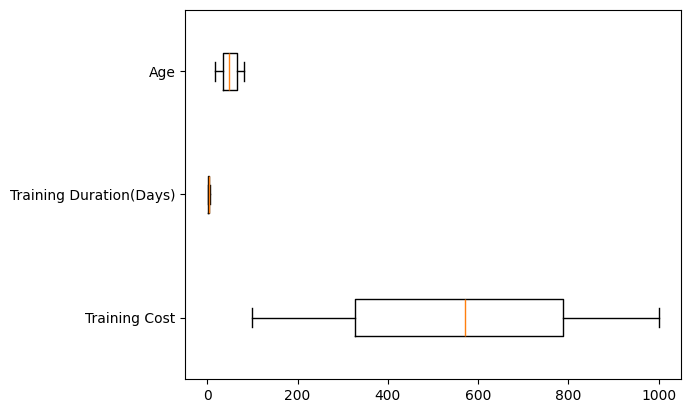

In [21]:
plt.boxplot(data[numerical_cols],
            tick_labels=numerical_cols,
            vert=False
            );

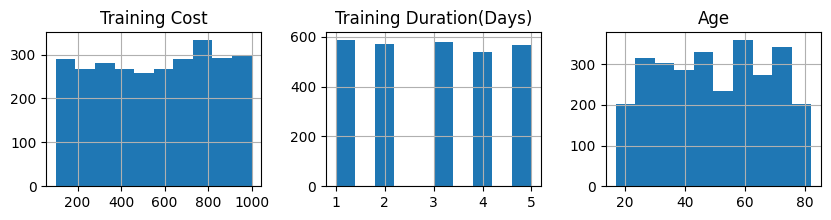

In [22]:
data.hist(numerical_cols, figsize=(10, 2), layout=(1,3));

https://docs.scipy.org/doc/scipy/reference/stats.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html

In [23]:
scipy.stats.fit(dist=scipy.stats.uniform, data=data['Training Cost'].values.T, bounds=((0, 10000), (0, 10000)))

  params: FitParams(loc=98.24038246263626, scale=908.5994479877763)
 success: True
 message: 'Optimization terminated successfully.'

### Ordinal variables structure and distributions

In [24]:
data[ordinal_cols].head()

,PayZone,Performance Score,Current Employee Rating,Engagement Score,Satisfaction Score,Work-Life Balance Score
0,Zone C,Fully Meets,4,1,2,3
1,Zone A,Fully Meets,3,2,1,5
2,Zone B,Fully Meets,4,1,2,1
3,Zone A,Fully Meets,2,5,5,4
4,Zone A,Fully Meets,3,2,5,3


In [25]:
data['Performance Score'].value_counts().sort_index()

Performance Score
Exceeds               346
Fully Meets          2251
Needs Improvement     162
PIP                    86
Name: count, dtype: int64

In [26]:
data['PayZone'].value_counts().sort_index()

PayZone
Zone A    1013
Zone B     934
Zone C     898
Name: count, dtype: int64

In [27]:
performance_score_dict = {'PIP': 1,
                          'Needs Improvement': 2,
                          'Fully Meets': 3,
                          'Exceeds': 4}

payzone_dict = {'Zone A': 1,
                'Zone B': 2,
                'Zone C': 3}

In [28]:
data['Performance Score_transformed'] = data['Performance Score'].map(performance_score_dict)

data['PayZone_transformed'] = data['PayZone'].map(payzone_dict)

ordinal_cols_transformed = ordinal_cols
ordinal_cols_transformed.remove('Performance Score')
ordinal_cols_transformed.remove('PayZone')
ordinal_cols_transformed += ['Performance Score_transformed']
ordinal_cols_transformed += ['PayZone_transformed']

In [29]:
data[ordinal_cols_transformed].describe().T

,count,mean,std,min,25%,50%,75%,max
Current Employee Rating,2845.0,2.974692,1.012610,1.0,2.0,3.0,3.0,5.0
Engagement Score,2845.0,2.941652,1.435230,1.0,2.0,3.0,4.0,5.0
Satisfaction Score,2845.0,3.028471,1.410067,1.0,2.0,3.0,4.0,5.0
Work-Life Balance Score,2845.0,2.989104,1.408816,1.0,2.0,3.0,4.0,5.0
Performance Score_transformed,2845.0,3.004218,0.547321,1.0,3.0,3.0,3.0,4.0
PayZone_transformed,2845.0,1.959578,0.818722,1.0,1.0,2.0,3.0,3.0


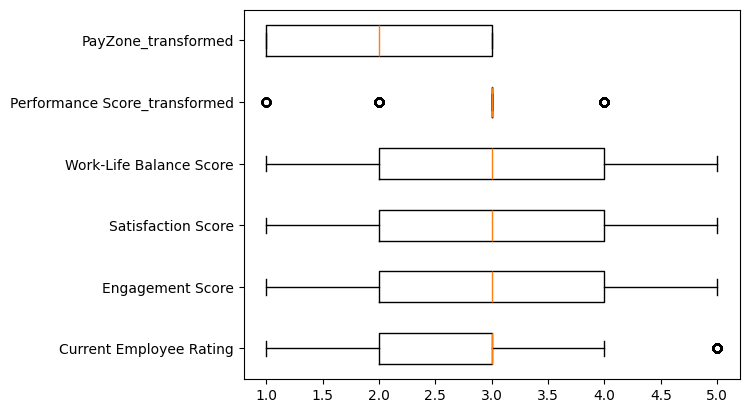

In [30]:
plt.boxplot(data[ordinal_cols_transformed],
            tick_labels=ordinal_cols_transformed,
            vert=False
            );

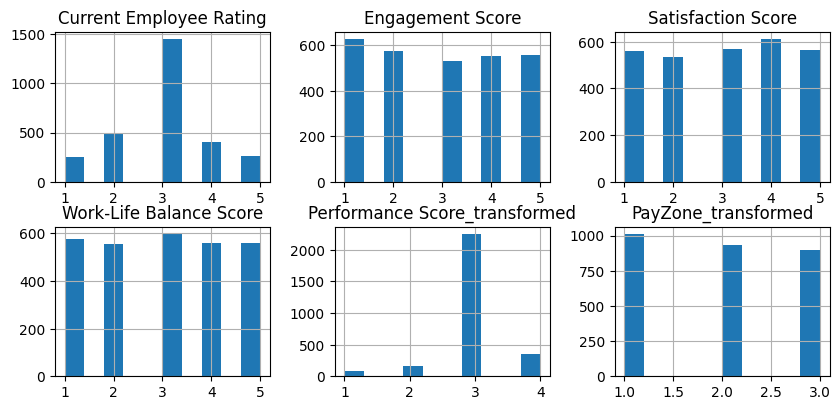

In [31]:
data.hist(ordinal_cols_transformed, figsize=(10, 7), layout=(3,3));


Current Employee Rating
1     252
2     483
3    1451
4     403
5     256
Name: Current Employee Rating, dtype: int64
          


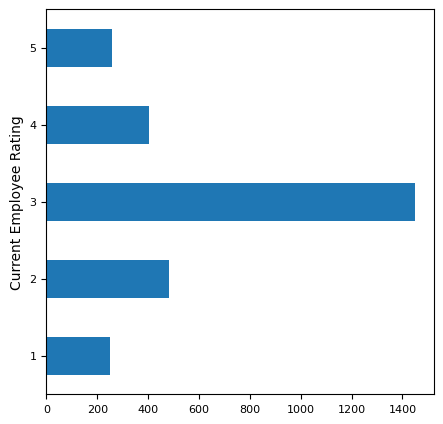


Engagement Score
1    628
2    576
3    532
4    552
5    557
Name: Engagement Score, dtype: int64
          


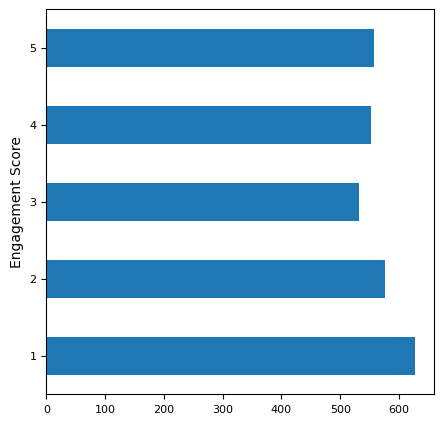


Satisfaction Score
1    562
2    537
3    569
4    612
5    565
Name: Satisfaction Score, dtype: int64
          


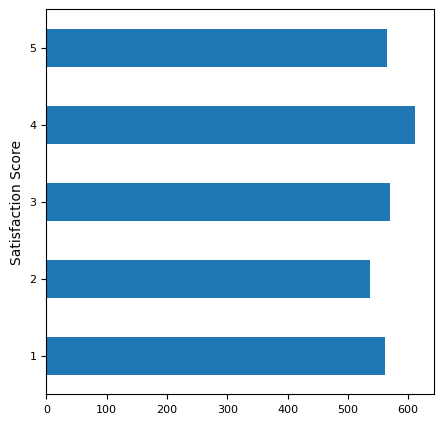


Work-Life Balance Score
1    575
2    555
3    599
4    558
5    558
Name: Work-Life Balance Score, dtype: int64
          


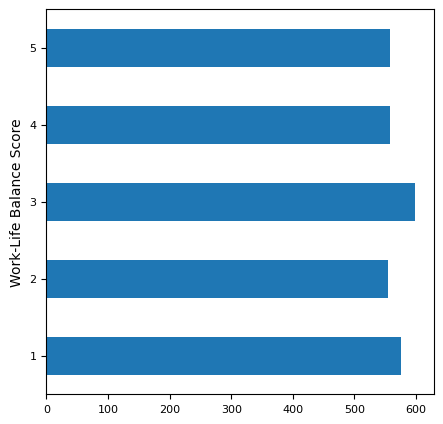


Performance Score_transformed
1      86
2     162
3    2251
4     346
Name: Performance Score_transformed, dtype: int64
          


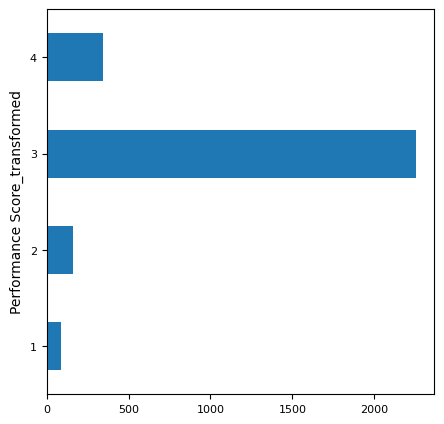


PayZone_transformed
1    1013
2     934
3     898
Name: PayZone_transformed, dtype: int64
          


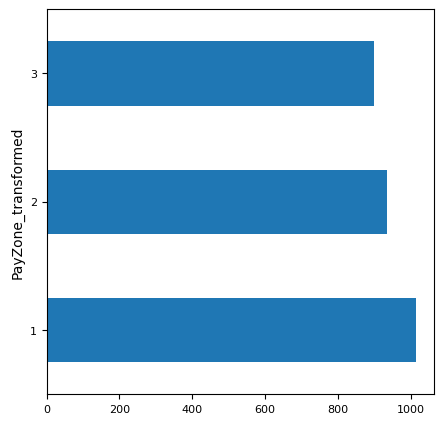

In [32]:
for i in range(len(ordinal_cols)):
    col_name = ordinal_cols[i]
    counts = pd.Series(data[col_name].value_counts(), name=col_name).sort_index(ascending=True)


    print(f"""
{counts}
          """)
    counts.plot(kind='barh', fontsize=8, figsize=(5, 5))
    plt.show()

# b) Correlations and relationships

Examples of questions:

1. Which variables are most correlated with your target variable? (If applicable)
2. Is there multicollinearity? (Two or more features that have a strong correlation) How will this affect your model?
3. Do you have variables that represent the same information? Can one be dropped?

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

<Axes: >

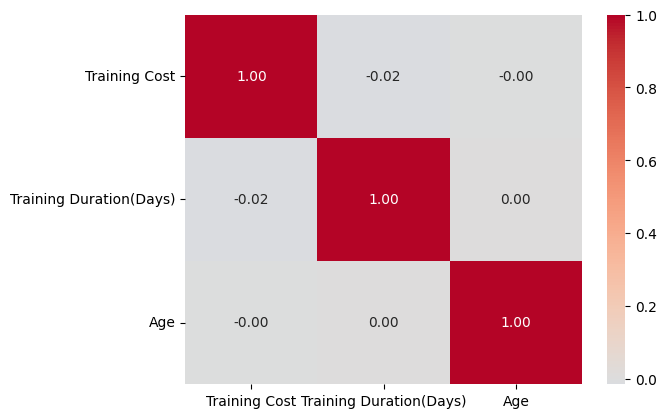

In [33]:
sns.heatmap(data[numerical_cols].corr(method="pearson"), annot=True, fmt=".2f", cmap='coolwarm', center=0)

<Axes: >

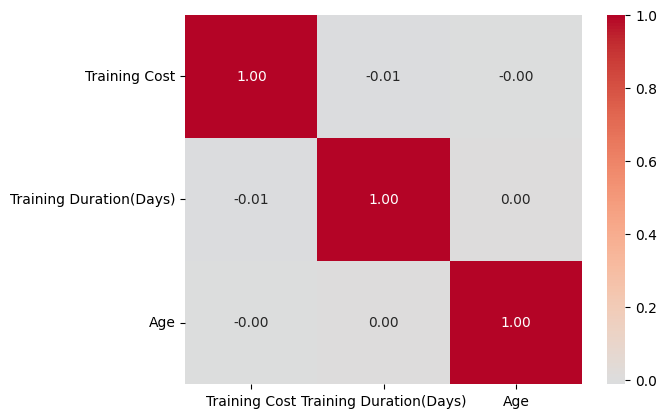

In [34]:
sns.heatmap(data[numerical_cols].corr(method="kendall"), annot=True, fmt=".2f", cmap='coolwarm', center=0)

<Axes: >

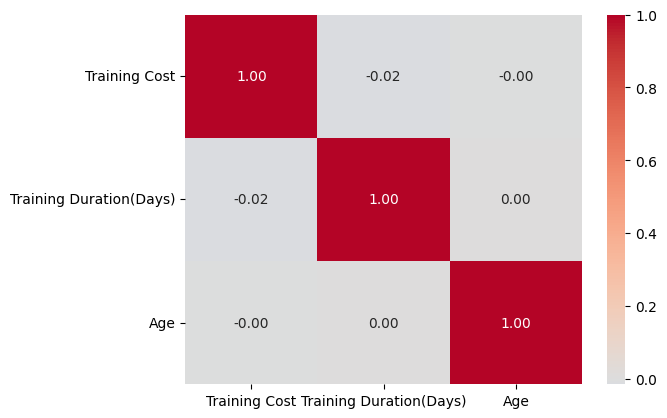

In [35]:
sns.heatmap(data[numerical_cols].corr(method="spearman"), annot=True, fmt=".2f", cmap='coolwarm', center=0)

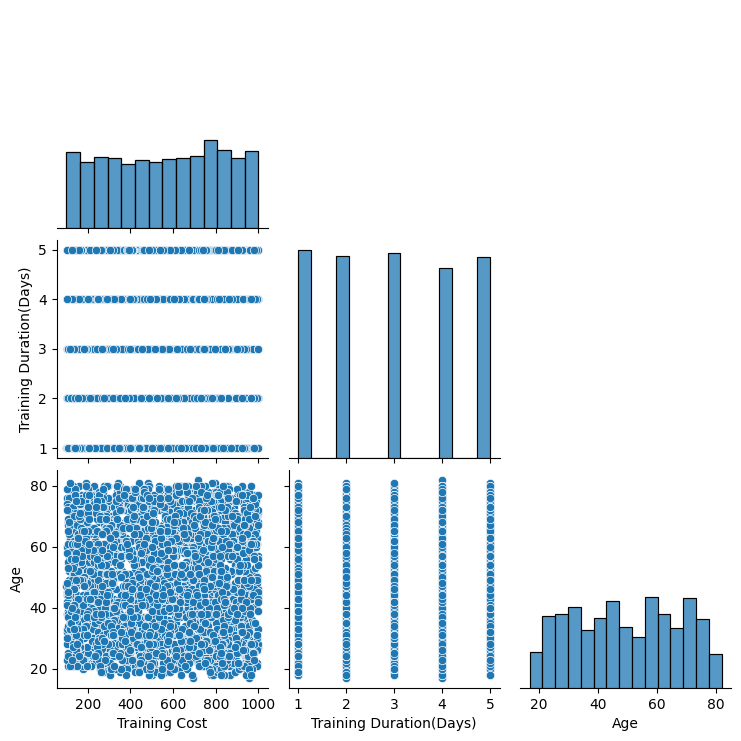

In [36]:
sns.pairplot(data[numerical_cols], corner=True);